In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../')))
from episiming.compartimentais import F
import episiming

In [3]:
dt = 1 # passo de tempo
t_0 = 0 # instante initial
num_dt = 80 # número de passos
dados_temporais = [t_0, dt, num_dt] # instantes de tempo
xs = np.arange(t_0, num_dt, dt)

In [4]:
num_infectados_0_base = 20 # número inicial de infectados
beta_r_base = 0.5 # taxa de contágio nas residências
beta_esc_base = 0.4 # taxa de contágio nas escolas
beta_emp_base = 0.2 # taxa de contágio no trabalho
beta_c_base = 0.2 # taxa de contágio na comunidade
gamma_base = 0.1 # inverso do tempo de recuperação

num_infectados_0 = num_infectados_0_base
beta_r = beta_r_base
beta_esc = beta_esc_base
beta_emp = beta_emp_base
beta_c = beta_c_base
gamma = gamma_base

In [5]:
%%time
tx_reducao = 1000
cenario_rio = episiming.cenarios.RiodeJaneiro(tx_reducao)
print(f'População do cenário reduzido: {cenario_rio.num_pop}\n')

População do cenário reduzido: 6333

Wall time: 2.75 s


In [6]:
%%time
cenario_rio.inicializa_infeccao(num_infectados_0, beta_r, beta_esc, beta_emp, beta_c,
                                gamma)

Wall time: 2.59 s


In [7]:
F

<function episiming.compartimentais.F(t, v, beta, theta, p, lamb, sigma, rho, epsA, gammaA, epsI, gammaI, deathI, gammaD, deathD)>

In [8]:
CI = np.array([3013953.6616344056, 3695396.65, 6474.0, 516.1376731188255, 2064.550692475302, 48.2, 433.8, 0.0, 4579.0, 49.8, 448.2, 16.0])
CI /= tx_reducao
pars1 = [1e-07 * tx_reducao, 0.1, 2/27, 2/33, 1/7, 0.8, 0.00203265306122449, 0.0996, 0.01915, 0.0766, 0.0013612589833390692, 0.0843, 0.000890053950644776]
pars2 = [9e-08 * tx_reducao, 0.1, 2/27, 2/33, 1/7, 0.8, 0.001626122448979592, 0.0996, 0.01149, 0.0766, 0.0013612589833390692, 0.0843, 0.000890053950644776]

In [9]:
X = solve_ivp(F, t_span=[t_0, num_dt], y0 = CI, t_eval=xs, args= pars1)
sol = X.y[:-4]
compartimentos = ['suscetiveis', 'quarentena', 'expostos', 'assintomaticos', 'infectados', 'diag assint', 'diag inf', 'recuperados']

In [10]:
np.shape(sol)

(8, 80)

In [11]:
CI

array([3.01395366e+03, 3.69539665e+03, 6.47400000e+00, 5.16137673e-01,
       2.06455069e+00, 4.82000000e-02, 4.33800000e-01, 0.00000000e+00,
       4.57900000e+00, 4.98000000e-02, 4.48200000e-01, 1.60000000e-02])

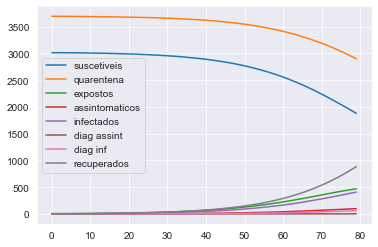

In [12]:
for i, y in enumerate(sol):
    plt.plot(xs, y, label=compartimentos[i])
plt.legend()
plt.show()

In [13]:
num_sim = 5 # número de simulações
X = cenario_rio.evolui_jit(dados_temporais, num_sim, show='sd')

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mInvalid use of Function(<function impl_append at 0x0000014D5E2C6400>) with argument(s) of type(s): (ListType[ListType[UniTuple(int64 x 2)]], ListType[Tuple(int64, int32)])
 * parameterized
[1mIn definition 0:[0m
[1m    LoweringError: Failed in nopython mode pipeline (step: nopython mode backend)
[1m[1mCannot cast ListType[Tuple(int64, int32)] to ListType[UniTuple(int64 x 2)]: %".24" = load {i8*, i8*}, {i8*, i8*}* %"item"
[1m
File "F:\Anaconda\lib\site-packages\numba\listobject.py", line 487:[0m
[1m    def impl(l, item):
[1m        casteditem = _cast(item, itemty)
[0m        [1m^[0m[0m
[0m
[0m[1m[1] During: lowering "$8call_function.3 = call $2load_global.0(item, $6load_deref.2, func=$2load_global.0, args=[Var(item, listobject.py:487), Var($6load_deref.2, listobject.py:487)], kws=(), vararg=None)" at F:\Anaconda\lib\site-packages\numba\listobject.py (487)[0m[0m
    raised from F:\Anaconda\lib\site-packages\numba\six.py:669
[1mIn definition 1:[0m
[1m    LoweringError: Failed in nopython mode pipeline (step: nopython mode backend)
[1m[1mCannot cast ListType[Tuple(int64, int32)] to ListType[UniTuple(int64 x 2)]: %".24" = load {i8*, i8*}, {i8*, i8*}* %"item"
[1m
File "F:\Anaconda\lib\site-packages\numba\listobject.py", line 487:[0m
[1m    def impl(l, item):
[1m        casteditem = _cast(item, itemty)
[0m        [1m^[0m[0m
[0m
[0m[1m[1] During: lowering "$8call_function.3 = call $2load_global.0(item, $6load_deref.2, func=$2load_global.0, args=[Var(item, listobject.py:487), Var($6load_deref.2, listobject.py:487)], kws=(), vararg=None)" at F:\Anaconda\lib\site-packages\numba\listobject.py (487)[0m[0m
    raised from F:\Anaconda\lib\site-packages\numba\six.py:669
[1mThis error is usually caused by passing an argument of a type that is unsupported by the named function.[0m[0m
[0m[1m[1] During: resolving callee type: BoundFunction((<class 'numba.types.containers.ListType'>, 'append') for ListType[ListType[UniTuple(int64 x 2)]])[0m
[0m[1m[2] During: typing of call at F:\Anaconda\lib\site-packages\numba\typed\typedlist.py (47)
[0m
[1m
File "F:\Anaconda\lib\site-packages\numba\typed\typedlist.py", line 47:[0m
[1mdef _append(l, item):
[1m    l.append(item)
[0m    [1m^[0m[0m


In [14]:
import datetime # date and time tools

import os, sys

import math

import random

import numpy as np
from scipy import stats
import pandas as pd

import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

import io, base64
from IPython.display import Image, HTML

In [15]:
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
import episiming

In [16]:
sns.set_style("darkgrid")

In [17]:
dt_string = datetime.datetime.now().strftime("%d/%b/%Y")
print(f"Atualização mais recente do kernel: {dt_string}")

Atualização mais recente do kernel: 19/Jun/2020


In [18]:
tx_reducao = 1000
cenario_rio = episiming.cenarios.RiodeJaneiro(tx_reducao)
print(f'População do cenário reduzido: {cenario_rio.num_pop}\n')

População do cenário reduzido: 6333



In [19]:
dt = 1 # passo de tempo
t_0 = 0 # instante initial
num_dt = 80 # número de passos
dados_temporais = [t_0, dt, num_dt] # instantes de tempo

In [20]:
num_infectados_0_base = 20 # número inicial de infectados
beta_r_base = 0.5 # taxa de contágio nas residências
beta_esc_base = 0.4 # taxa de contágio nas escolas
beta_emp_base = 0.2 # taxa de contágio no trabalho
beta_c_base = 0.2 # taxa de contágio na comunidade
gamma_base = 0.1 # inverso do tempo de recuperação

In [21]:
num_infectados_0 = num_infectados_0_base
beta_r = beta_r_base
beta_esc = beta_esc_base
beta_emp = beta_emp_base
beta_c = beta_c_base
gamma = gamma_base

cenario_rio.inicializa_infeccao(num_infectados_0, beta_r, beta_esc, beta_emp, beta_c,
                                gamma)

In [22]:
num_sim = 5 # número de simulações
X = cenario_rio.evolui_jit(dados_temporais, num_sim, show='sd')

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mInvalid use of Function(<function impl_append at 0x0000014D5E2C6400>) with argument(s) of type(s): (ListType[ListType[UniTuple(int64 x 2)]], ListType[Tuple(int64, int32)])
 * parameterized
[1mIn definition 0:[0m
[1m    LoweringError: Failed in nopython mode pipeline (step: nopython mode backend)
[1m[1mCannot cast ListType[Tuple(int64, int32)] to ListType[UniTuple(int64 x 2)]: %".24" = load {i8*, i8*}, {i8*, i8*}* %"item"
[1m
File "F:\Anaconda\lib\site-packages\numba\listobject.py", line 487:[0m
[1m    def impl(l, item):
[1m        casteditem = _cast(item, itemty)
[0m        [1m^[0m[0m
[0m
[0m[1m[1] During: lowering "$8call_function.3 = call $2load_global.0(item, $6load_deref.2, func=$2load_global.0, args=[Var(item, listobject.py:487), Var($6load_deref.2, listobject.py:487)], kws=(), vararg=None)" at F:\Anaconda\lib\site-packages\numba\listobject.py (487)[0m[0m
    raised from F:\Anaconda\lib\site-packages\numba\six.py:669
[1mIn definition 1:[0m
[1m    LoweringError: Failed in nopython mode pipeline (step: nopython mode backend)
[1m[1mCannot cast ListType[Tuple(int64, int32)] to ListType[UniTuple(int64 x 2)]: %".24" = load {i8*, i8*}, {i8*, i8*}* %"item"
[1m
File "F:\Anaconda\lib\site-packages\numba\listobject.py", line 487:[0m
[1m    def impl(l, item):
[1m        casteditem = _cast(item, itemty)
[0m        [1m^[0m[0m
[0m
[0m[1m[1] During: lowering "$8call_function.3 = call $2load_global.0(item, $6load_deref.2, func=$2load_global.0, args=[Var(item, listobject.py:487), Var($6load_deref.2, listobject.py:487)], kws=(), vararg=None)" at F:\Anaconda\lib\site-packages\numba\listobject.py (487)[0m[0m
    raised from F:\Anaconda\lib\site-packages\numba\six.py:669
[1mThis error is usually caused by passing an argument of a type that is unsupported by the named function.[0m[0m
[0m[1m[1] During: resolving callee type: BoundFunction((<class 'numba.types.containers.ListType'>, 'append') for ListType[ListType[UniTuple(int64 x 2)]])[0m
[0m[1m[2] During: typing of call at F:\Anaconda\lib\site-packages\numba\typed\typedlist.py (47)
[0m
[1m
File "F:\Anaconda\lib\site-packages\numba\typed\typedlist.py", line 47:[0m
[1mdef _append(l, item):
[1m    l.append(item)
[0m    [1m^[0m[0m


In [ ]:
import numba